# 와인 품질 예측하기


![](https://labelyourdata.com/img/article-illustrations/ml_essential_tool.jpg)

## 1.환경준비

### (1) 라이브러리 로딩

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [11]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [12]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/winequality-white.csv"
data = pd.read_csv(path)
# data['quality'].value_counts()
data['quality'] = np.where(data['quality'] == 3, 4, np.where(data['quality'] == 9, 8, data['quality']))
data['quality'] = data['quality'] - 4
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


* 범주가 5개 입니다.
    * 0 - 최하  ~  4 - 최상

In [13]:
data['quality'].value_counts()

2    2198
1    1457
3     880
0     183
4     180
Name: quality, dtype: int64

## 2.데이터 준비

### (1) 데이터 준비
* y에 대한 전처리 : 위에서 이미 0 ~ 4로 범주를 맞췄습니다.
* x, y 나누기

In [14]:
target = 'quality'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (2) 데이터 분할

In [15]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size= .3, random_state = 20)

### (3) 스케일링

In [16]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

최소 3개 이상의 모델을 생성하고 성능을 비교하시오.

In [17]:
# feature 개수 확인
print(x_train.shape[1])

# y는 정수 인코딩
print(len(y_train.unique()))

# 11 -> 15 -> 10 -> 5

11

### (1) 모델1

In [22]:
clear_session()
model = Sequential([Dense(15, input_shape=(x_train.shape[1],) , activation='relu'),
                    Dense(10, activation='relu'),
                    Dense(5, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 395 (1.54 KB)
Trainable params: 395 (1.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


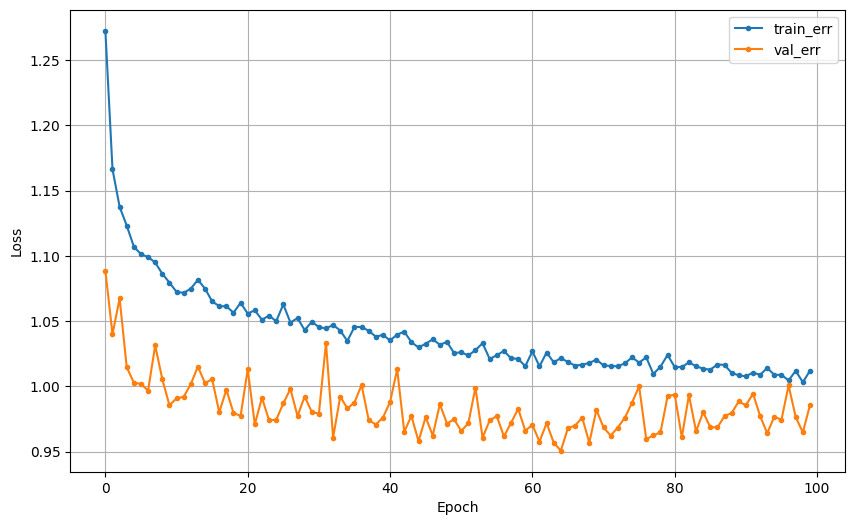

46/46 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.75      0.15      0.25        61
           1       0.56      0.66      0.60       438
           2       0.54      0.67      0.60       660
           3       0.46      0.23      0.31       250
           4       0.00      0.00      0.00        61

    accuracy                           0.54      1470
   macro avg       0.46      0.34      0.35      1470
weighted avg       0.52      0.54      0.51      1470



In [23]:
# compile
model.compile( optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy')
history = model.fit(x_train, y_train, epochs=100, validation_split=.2, verbose=0).history
dl_history_plot(history)

y_pred = model.predict(x_val)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_val, y_pred))

### (2) 모델2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                180       
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 15)                240       
                                                                 
 dense_3 (Dense)             (None, 10)                160       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


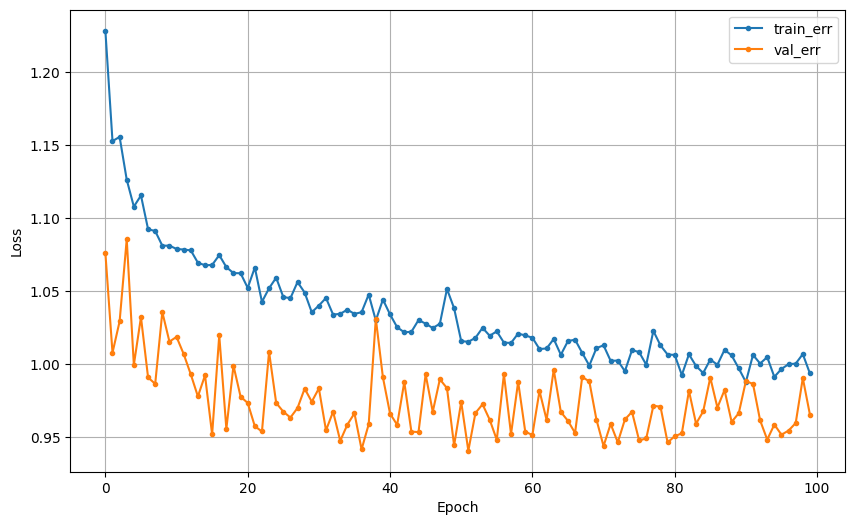

46/46 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        61
           1       0.58      0.58      0.58       438
           2       0.55      0.64      0.59       660
           3       0.41      0.44      0.42       250
           4       0.00      0.00      0.00        61

    accuracy                           0.54      1470
   macro avg       0.51      0.34      0.33      1470
weighted avg       0.53      0.54      0.51      1470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
clear_session()
model = Sequential([Dense(15, input_shape=(x_train.shape[1],) , activation='relu'),
                    Dense(15, activation='relu'),
                    Dense(15, activation='relu'),
                    Dense(10, activation='relu'),
                    Dense(5, activation='softmax')])
model.summary()

# compile
model.compile( optimizer=Adam(learning_rate=0.02), loss='sparse_categorical_crossentropy')
history = model.fit(x_train, y_train, epochs=100, validation_split=.2, verbose=0).history
dl_history_plot(history)

y_pred = model.predict(x_val)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_val, y_pred))

### (3) 모델3

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                180       
                                                                 
 dense_1 (Dense)             (None, 20)                320       
                                                                 
 dense_2 (Dense)             (None, 15)                315       
                                                                 
 dense_3 (Dense)             (None, 11)                176       
                                                                 
 dense_4 (Dense)             (None, 8)                 96        
                                                                 
 dense_5 (Dense)             (None, 5)                 45        
                                                                 
Total params: 1132 (4.42 KB)
Trainable params: 1132 (4.4

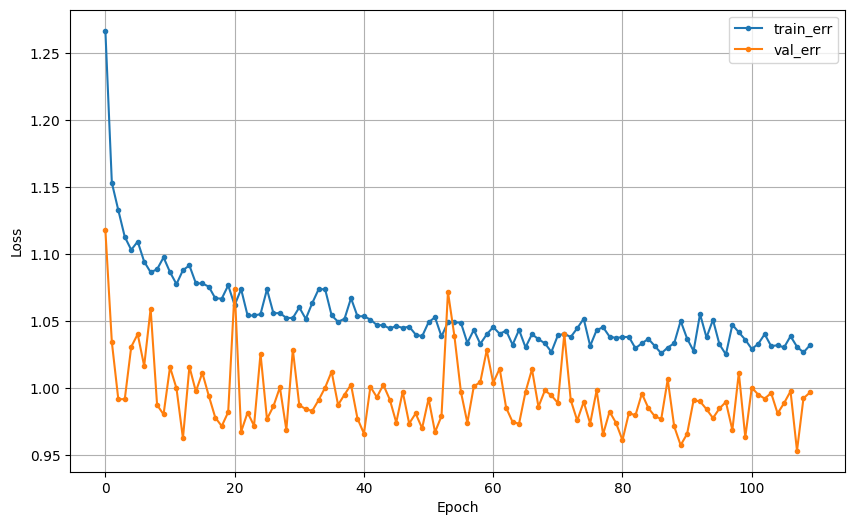

46/46 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.53      0.71      0.61       438
           2       0.53      0.67      0.59       660
           3       0.51      0.11      0.18       250
           4       0.33      0.02      0.03        61

    accuracy                           0.53      1470
   macro avg       0.38      0.30      0.28      1470
weighted avg       0.50      0.53      0.48      1470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
clear_session()
model = Sequential([Dense(15, input_shape=(x_train.shape[1],) , activation='relu'),
                    Dense(20, activation='relu'),
                    Dense(15, activation='relu'),
                    Dense(11, activation='relu'),
                    Dense(8, activation='relu'),
                    Dense(5, activation='softmax')])
model.summary()

# compile
model.compile( optimizer=Adam(learning_rate=0.02), loss='sparse_categorical_crossentropy')
history = model.fit(x_train, y_train, epochs=110, validation_split=.2, verbose=0).history
dl_history_plot(history)

y_pred = model.predict(x_val)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_val, y_pred))

In [29]:
print(confusion_matrix(y_val, y_pred)) # 2등급을 1등급으로 예측한것과 0등급으로 예측한 경우는 심각성이 다르다
# 따라서 confusion matrix를 확인해서 precision 과 recall이 어떤 구성으로 계산되었는지 확인해야 한다.


[[  0  46  15   0   0]
 [  0 309 127   2   0]
 [  0 204 442  14   0]
 [  0  21 199  28   2]
 [  0   0  49  11   1]]
